<a href="https://colab.research.google.com/github/nielsrolf/ddsp/blob/master/ddsp/colab/experiments/01_prepare_urmp_mono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare URMP mono audio




In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install -q git+git://github.com/nielsrolf/ddsp

from ddsp.colab import colab_utils

In [3]:
!cp drive/MyDrive/ddsp/mono-instruments.zip .
!unzip -q mono-instruments.zip
!rm mono-instruments.zip

replace mono-instruments/AuSep_3_va_32_Fugue.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [8]:
from glob import glob
import shutil
import os

filenames = glob("mono-instruments/*.wav")
group = 0
while len(filenames) > 0:
    group += 1
    os.makedirs(f"group{group}", exist_ok=True)
    current_files = filenames[:5]
    filenames = filenames[5:]
    for filename in current_files:
        dest = filename.replace("mono-instruments", f"group{group}")
        print(f"{filename}=>{dest}")
        shutil.copy(filename, dest)
    file_pattern = f"group{group}/*.wav"
    tfrecords_pattern = f"drive/MyDrive/ddsp/urmp-mono/group{group}.tfrecord"
    !ddsp_prepare_tfrecord --input_audio_filepatterns={file_pattern} --output_tfrecord_path={tfrecords_pattern} --num_shards=5 --alsologtostderr

mono-instruments/AuSep_4_bn_28_Fugue.wav=>group1/AuSep_4_bn_28_Fugue.wav
mono-instruments/AuSep_4_sax_25_Pirates.wav=>group1/AuSep_4_sax_25_Pirates.wav
mono-instruments/AuSep_2_tpt_34_Fugue.wav=>group1/AuSep_2_tpt_34_Fugue.wav
mono-instruments/AuSep_3_va_13_Hark.wav=>group1/AuSep_3_va_13_Hark.wav
mono-instruments/AuSep_3_vc_19_Pavane.wav=>group1/AuSep_3_vc_19_Pavane.wav
2021-01-16 21:33:02.941863: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
I0116 21:33:07.081945 140212482447232 translations.py:641] ==================== <function annotate_downstream_side_inputs at 0x7f854b4746a8> ====================
I0116 21:33:07.082684 140212482447232 translations.py:641] ==================== <function fix_side_input_pcoll_coders at 0x7f854b4747b8> ====================
I0116 21:33:07.083117 140212482447232 translations.py:641] ==================== <function eliminate_common_key_with_none at 0x7f854b474950> ====================


/usr/local/lib/python3.6/dist-packages/ddsp/training/plotting.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  **matshow_kwargs)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ddsp/training/plotting.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  **matshow_kwargs)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


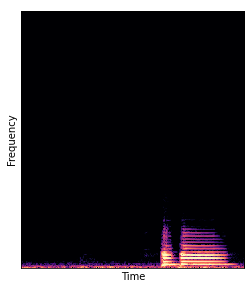

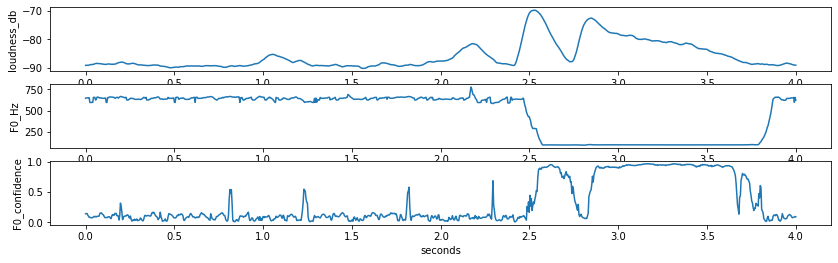

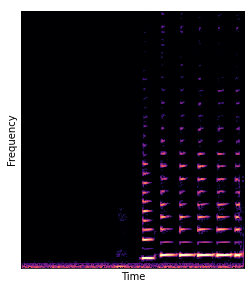

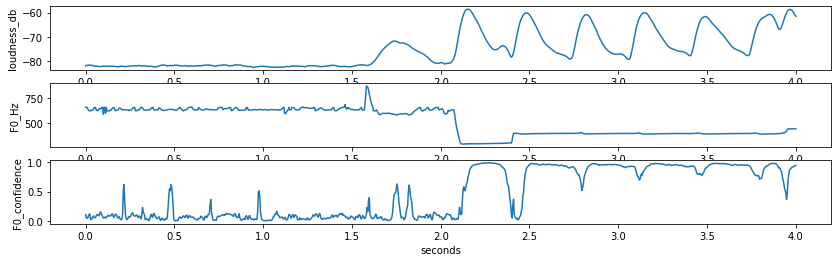

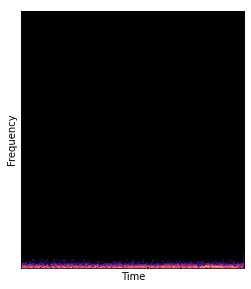

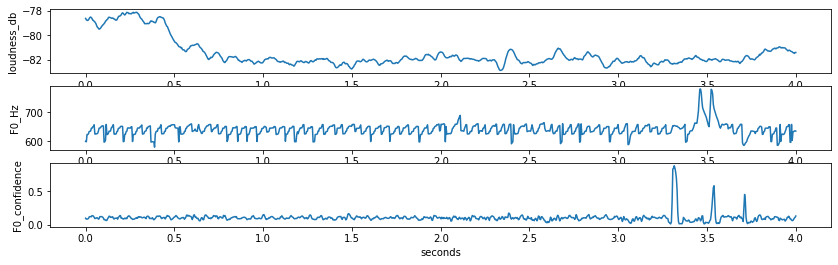

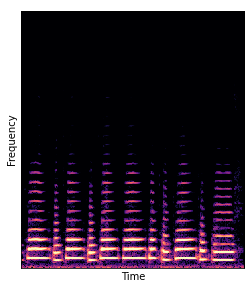

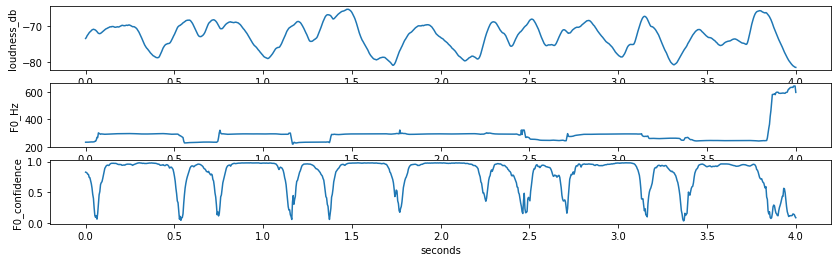

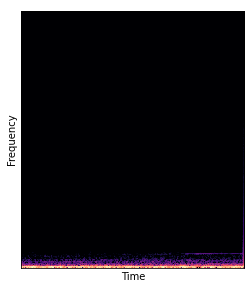

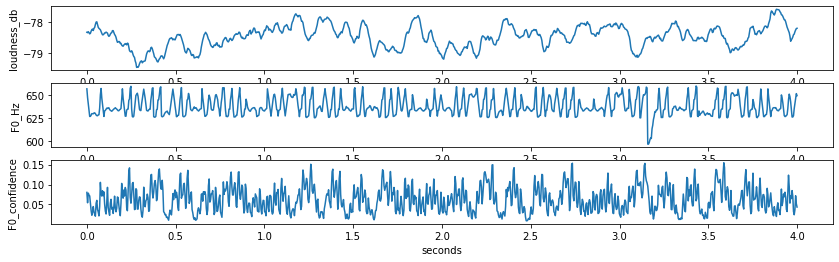

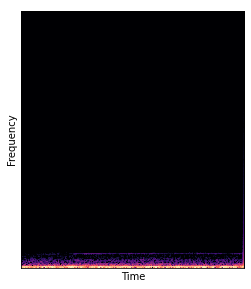

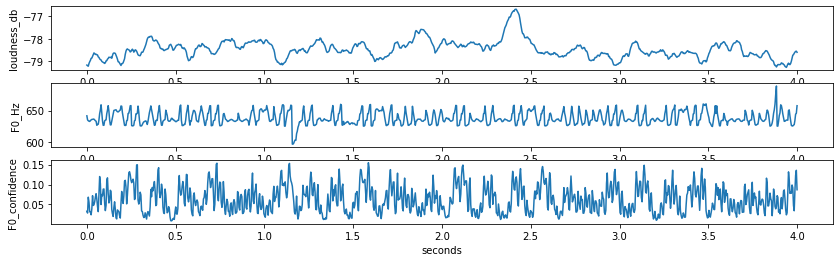

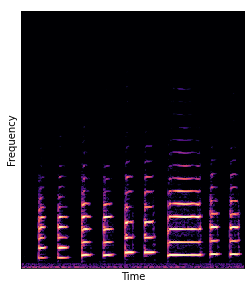

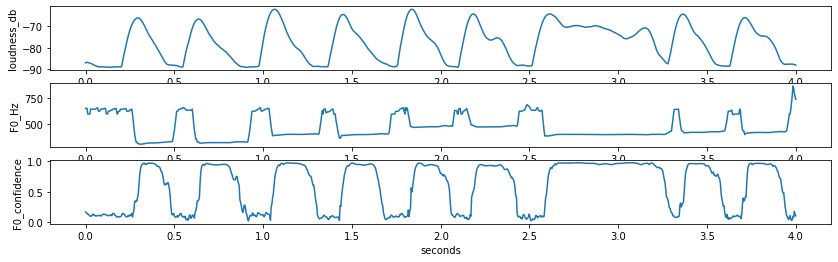

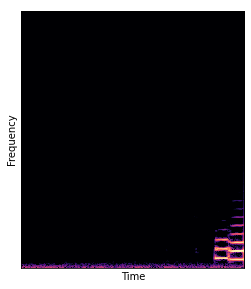

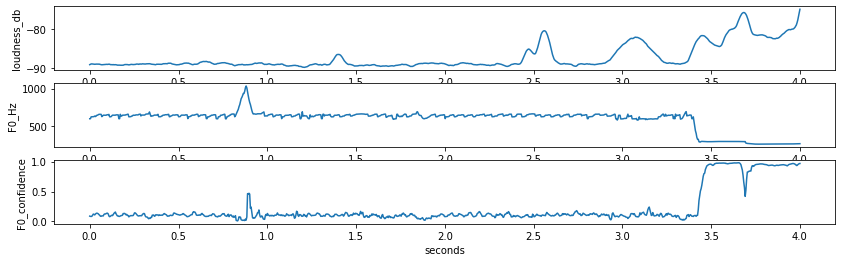

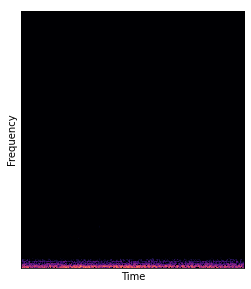

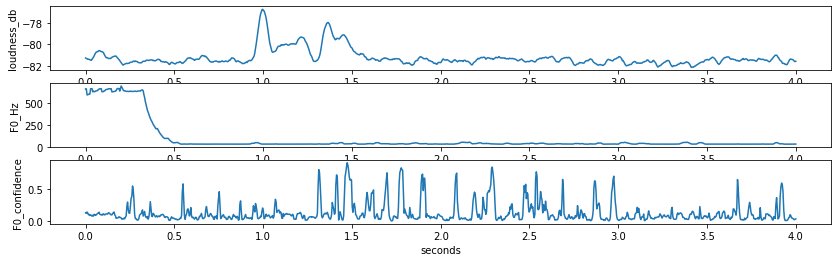

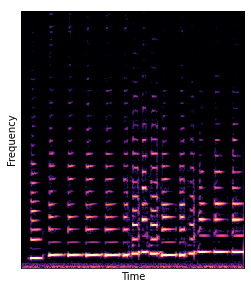

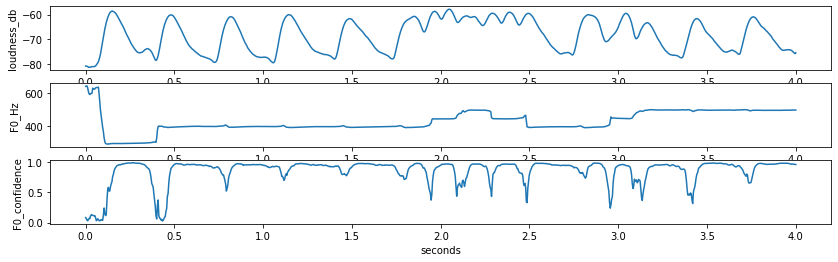

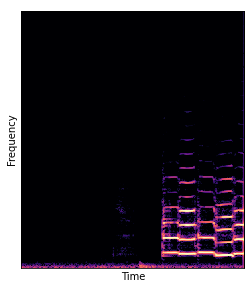

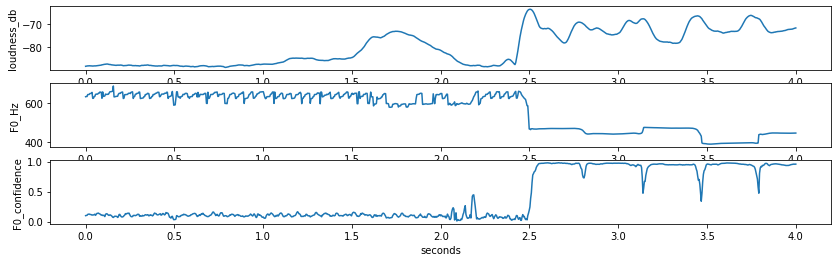

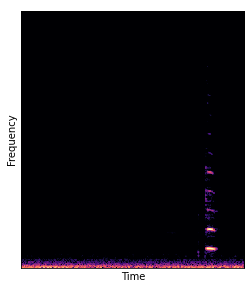

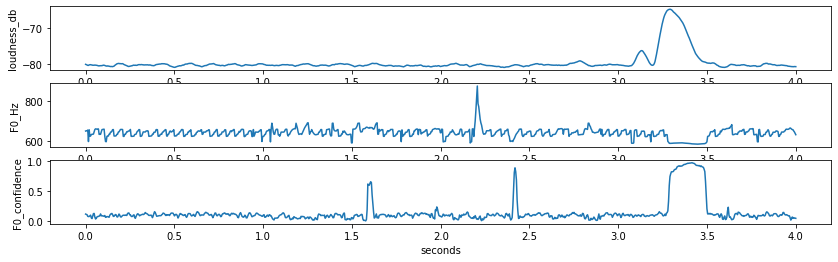

In [30]:
from ddsp.colab import colab_utils
import ddsp.training
from matplotlib import pyplot as plt
import numpy as np

TRAIN_TFRECORD_FILEPATTERN = "drive/MyDrive/ddsp/urmp-mono/group*.tfrecord*"
data_provider = ddsp.training.data.TFRecordProvider(TRAIN_TFRECORD_FILEPATTERN)
dataset = data_provider.get_dataset(shuffle=True)

try:
  ex = next(iter(dataset))
except StopIteration:
  raise ValueError(
      'TFRecord contains no examples. Please try re-running the pipeline with '
      'different audio file(s).')

for i, ex in enumerate(iter(dataset)):
    colab_utils.specplot(ex['audio'])
    colab_utils.play(ex['audio'])

    f, ax = plt.subplots(3, 1, figsize=(14, 4))
    x = np.linspace(0, 4.0, 1000)
    ax[0].set_ylabel('loudness_db')
    ax[0].plot(x, ex['loudness_db'])
    ax[1].set_ylabel('F0_Hz')
    ax[1].set_xlabel('seconds')
    ax[1].plot(x, ex['f0_hz'])
    ax[2].set_ylabel('F0_confidence')
    ax[2].set_xlabel('seconds')
    ax[2].plot(x, ex['f0_confidence'])
    if i>10:
        break

In [31]:
for i, _ in enumerate(dataset):
    pass
i

16179

In [32]:
print(f"Wow, that is {i//(15*60)}:{(i%(15*60))//15} hours of music")

Wow, that is 17:58 hours of music
